# Discrete Event Simulator

## Part 1

In [10]:
from distributions import *




ValueError: operands could not be broadcast together with shapes (10000,) (2,) 

In [ ]:
print(getExponential([1,1]))

In [251]:
import numpy as np
from distributions import *
import scipy.stats as stats

class dists:
    def __init__(self, arrival_dist, arrival_dist_parms, leave_dist, leave_dist_parms):
        self.arrival_dist = arrival_dist
        self.arrival_dist_parms = arrival_dist_parms
        self.leave_dist = leave_dist
        self.leave_dist_parms = leave_dist_parms

class event:
    def __init__(self, time, dists: dists, state):
        if state == 'a':
            self.t = dists.arrival_dist(dists.arrival_dist_parms)[0]
            self.time = time + self.t
        elif state == 'l':
            self.t = dists.leave_dist(dists.leave_dist_parms)[0]
            self.time = time + self.t
        self.state = state


def insertInEventList(event, event_list):
    idx = 0
    next_event = event_list[0]
    while next_event.time < event.time:
        idx += 1
        next_event = event_list[idx]
    #print(event.time, next_event.time)
    return np.insert(event_list, idx, event)

m = 10

time = 0
lamb = 1

k = 10000
n = 10


arrival_lambda = 1
leave_lambda = 1/8

# distributions = dists(getExponential, [arrival_lambda, 1], getExponential, [leave_lambda, 1])
distributions = dists(getExponential, [arrival_lambda,1], getExponential, [leave_lambda, 1])

blocked_arr = np.array([m]*10)

time = 0
blocked = 0
nonblocked = 0
num_customers = 0
service_points = np.array([0] * m)
event_list = np.array([event(np.inf, distributions, 'l')])
num_left = 0
ts = 0
ts2 = 0

arrival_times = np.zeros(k)
service_times = np.zeros(k)
for i in range (k):
    e = event(0, distributions, 'a')
    arrival_times[i] = e.time
    e = event(0, distributions, 'l')
    service_times[i] = e.time

arrival_times = np.cumsum(arrival_times)
#service_times = np.cumsum(service_times)

arrivalsCount = 0
servicesCount = 0
# Run simulation untill 

while num_customers < k:
    time = arrival_times[arrivalsCount]
    arrivalsCount += 1
    service_points[service_points < time] = 0
    # print(service_points)
    if any(service_points == 0):
        service_points[np.argmin(service_points)] = time + service_times[servicesCount]
        servicesCount += 1
    else:
        blocked += 1
    num_customers += 1

print(blocked)    

print("Hej")

# while num_customers < k:
#     arrival = event(time,distributions, 'a')
#     ts += arrival.t
#     event_list = insertInEventList(arrival, event_list)
#     e = event_list[0]
#     if e.time < time:
#         print("FUCK")

#     time = e.time

#     #print(f"Tiden er {time}")
#     event_list = np.delete(event_list, 0)

#     if e.state == 'a':  # A customer has arrivel
#         if any(service_points == 0):    # Customer is serviced
#             service_points[np.argmin(service_points)] = 1
#             leave = event(time, distributions, 'l')
#             ts2 += leave.t
#             event_list = insertInEventList(leave, event_list)
#             nonblocked += 1
#         else:   # Customer is blocked
#             blocked += 1
#         num_customers += 1
#     else:
#         num_left += 1
#         service_points[np.argmax(service_points)] = 0

    #print(time)
    
    # if num_customers % 100 == 0:
    #     liste = []
    #     for e in event_list:
    #         liste.append(e.state)
    #     print(liste)

# blocked = blocked

    #blocked_arr[i] = blocked

[0 0 0 0 0 0 0 0 0 0]
[2 0 0 0 0 0 0 0 0 0]
[2 4 0 0 0 0 0 0 0 0]
[ 2  4 46  0  0  0  0  0  0  0]
[ 0  0 46  0  0  0  0  0  0  0]
[ 0  0 46  0  0  0  0  0  0  0]
[20  0 46  0  0  0  0  0  0  0]
[20 10 46  0  0  0  0  0  0  0]
[20 10 46  9  0  0  0  0  0  0]
[20 10 46  9 13  0  0  0  0  0]
[20 10 46  9 13 13  0  0  0  0]
[20 10 46  0 13 13 16  0  0  0]
[20  0 46 17 13 13 16  0  0  0]
[20 13 46 17 13 13 16  0  0  0]
[20 13 46 17 13 13 16 14  0  0]
[20 13 46 17 13 13 16 14 26  0]
[20  0 46 17  0  0 16  0 26  0]
[20 18 46 17  0  0 16  0 26  0]
[20 18 46  0 18  0  0  0 26  0]
[20  0 46  0  0  0  0  0 26  0]
[ 0 25 46  0  0  0  0  0 26  0]
[41 25 46  0  0  0  0  0 26  0]
[41 25 46  0  0  0  0  0 26  0]
[41  0 46 41  0  0  0  0  0  0]
[41 32 46 41  0  0  0  0  0  0]
[41 32 46 41 29  0  0  0  0  0]
[41 32 46 41 29 28  0  0  0  0]
[41 32 46 41 29 28 28  0  0  0]
[41 32 46 41  0  0  0 38  0  0]
[41  0 46 41 38  0  0 38  0  0]
[41 48 46 41 38  0  0 38  0  0]
[41 48 46 41  0 46  0  0  0  0]
[41 48

In [249]:
print(blocked)
print(nonblocked)
print(num_left)
print(time)
print(ts)
print(ts2)

print(np.mean(arrival_times))
print(np.mean(service_times))

0
0
0
9925.525674039387
0
0
4928.070969118129
0.12396704199941776


## Erlangs Solution

In [56]:
import math as math
lam = 1
s = 8
A = lam * s

S = 0
for i in range (m):
    S += A**i / math.factorial(i)
B = (A**m ) / math.factorial(m) / (S)

print(B)

0.13851266214160918


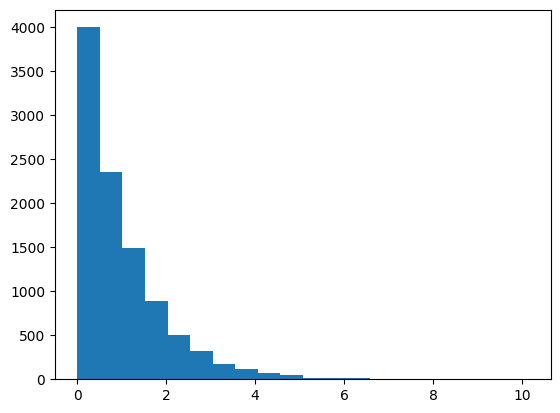

In [145]:
import matplotlib.pyplot as plt
arr = getExponential([arrival_lambda, 10000])
plt.hist(arr, bins = 20)
plt.show()



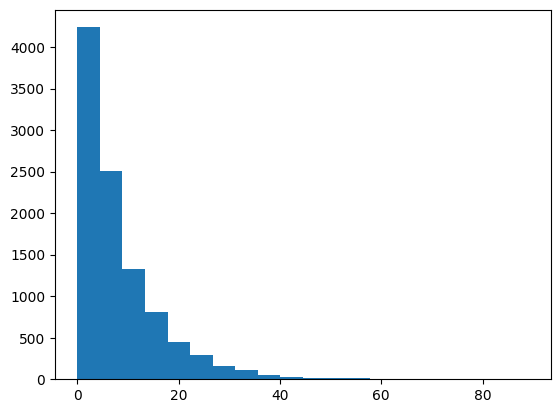

In [128]:

arr2 = getExponential([leave_lambda, 10000])
plt.hist(arr2, bins = 20)
plt.show()

In [234]:
m = 10
n = 10
k = 10000



time = 0
ts = 0
event_list = np.array([event(np.inf, distributions, 'l')])
service_points = np.array([0]*m)

blocked = 0
num_customers = 0
tid = 0

count = 0
for i in range(1000):
    arrival = event(tid,distributions, 'a')
    event_list = insertInEventList(arrival, event_list)

    e = event_list[count]
    count += 1
    time = e.time
    tid = time

    if e.state == 'a':
        if any(service_points == 0):
            service_points[np.argmin(service_points)] = 1

            leave = event(tid, distributions, 'l')
            event_list = insertInEventList(leave, event_list)
        else:
            blocked += 1
        num_customers += 1
    else:
        service_points[np.argmax(service_points)] = 0

print(blocked)
print(tid)

time = -1
for ev in event_list:
    if ev.time < time:
        print("Lucas har fucket up")
    time = ev.time

898
46.83097348908611
